In [ ]:
# @title
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.datasets import load_breast_cancer
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import LabelEncoder

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/diabetes_prediction_dataset.csv')
print(df.info())
print(df.columns)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  object 
 1   age                  100000 non-null  float64
 2   hypertension         100000 non-null  int64  
 3   heart_disease        100000 non-null  int64  
 4   smoking_history      100000 non-null  object 
 5   bmi                  100000 non-null  float64
 6   HbA1c_level          100000 non-null  float64
 7   blood_glucose_level  100000 non-null  int64  
 8   diabetes             100000 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 6.9+ MB
None
Index(['gender', 'age', 'hypertension', 'heart_disease', 'smoking_history',
       'bmi', 'HbA1c_level', 'blood_glucose_level', 'diabetes'],
      dtype='object')


In [ ]:
le = LabelEncoder()

df['gender'] = le.fit_transform(df['gender'])
df['smoking_history'] = le.fit_transform(df['smoking_history'])

In [ ]:
df.corr()
df.shape

(100000, 9)

In [ ]:
df[df.duplicated()]


,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
2756,1,80.0,0,0,0,27.32,6.6,159,0
3272,0,80.0,0,0,0,27.32,3.5,80,0
3418,0,19.0,0,0,0,27.32,6.5,100,0
3939,0,78.0,1,0,3,27.32,3.5,130,0
3960,1,47.0,0,0,0,27.32,6.0,200,0
...,...,...,...,...,...,...,...,...,...
99980,0,52.0,0,0,4,27.32,6.1,145,0
99985,1,25.0,0,0,0,27.32,5.8,145,0
99989,0,26.0,0,0,0,27.32,5.0,158,0
99990,1,39.0,0,0,0,27.32,6.1,100,0


In [ ]:
df = df.fillna(df.mean(numeric_only=True))


<Axes: >

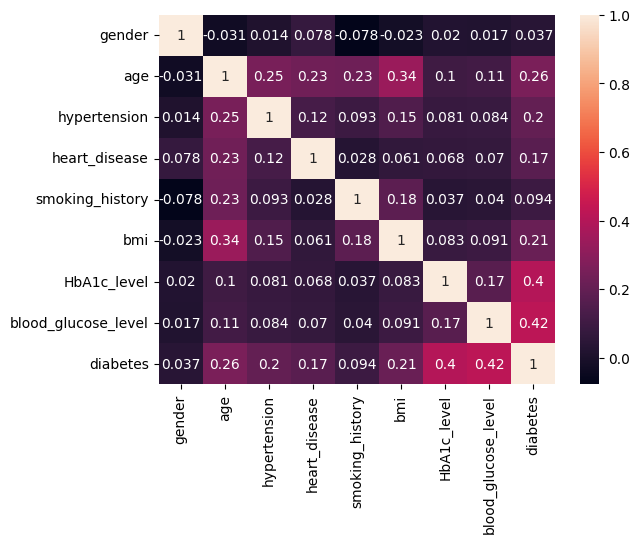

In [ ]:
sns.heatmap(df.corr(), annot=True)

In [ ]:
print(df.head())

   gender   age  hypertension  heart_disease  smoking_history    bmi  \
0       0  80.0             0              1                4  25.19   
1       0  54.0             0              0                0  27.32   
2       1  28.0             0              0                4  27.32   
3       0  36.0             0              0                1  23.45   
4       1  76.0             1              1                1  20.14   

   HbA1c_level  blood_glucose_level  diabetes  
0          6.6                  140         0  
1          6.6                   80         0  
2          5.7                  158         0  
3          5.0                  155         0  
4          4.8                  155         0  


In [ ]:
# df = df.drop(['BloodPressure', 'SkinThickness'], axis=1)

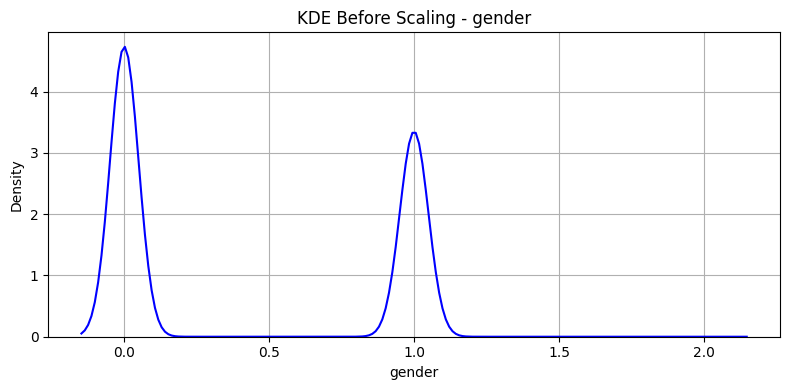

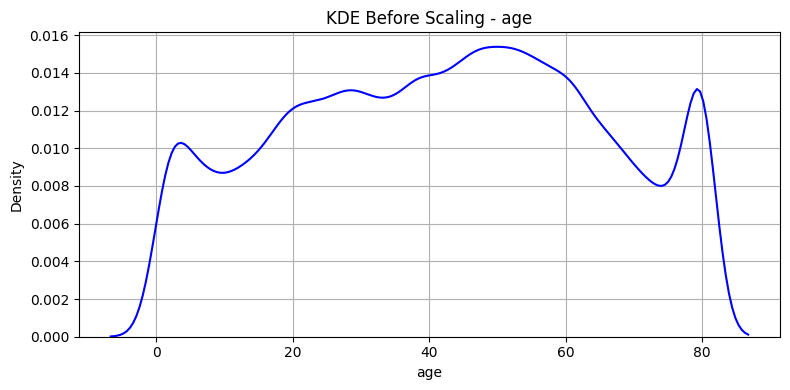

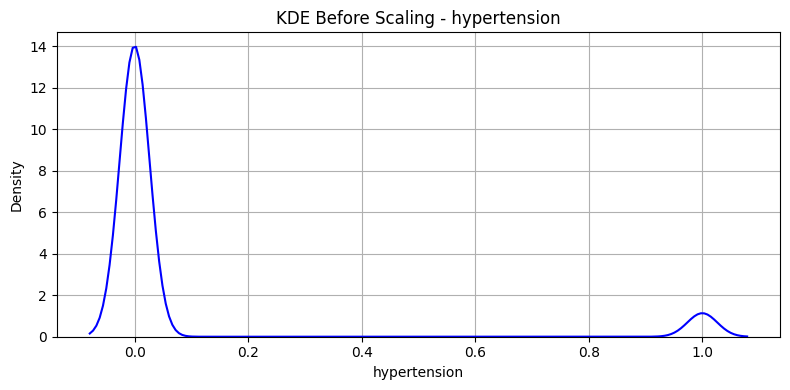

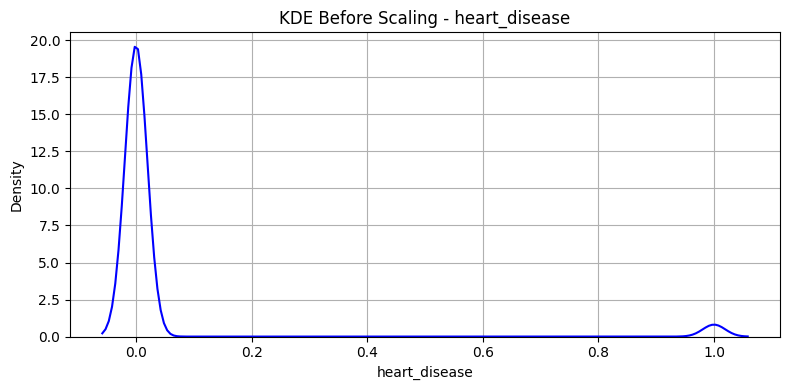

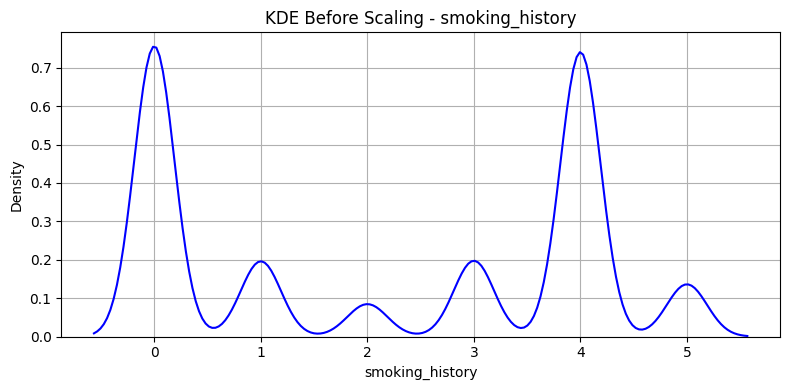

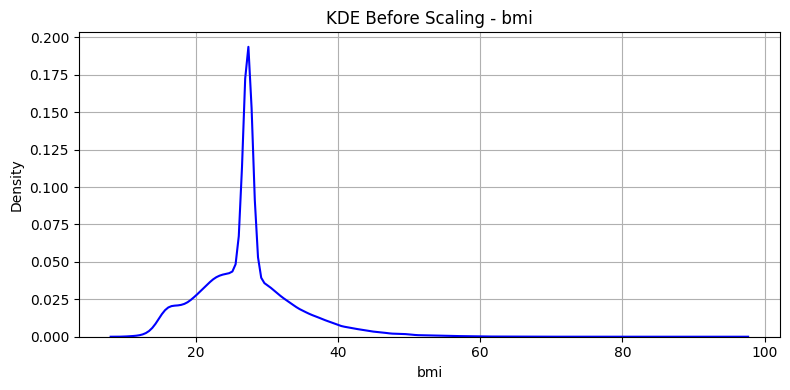

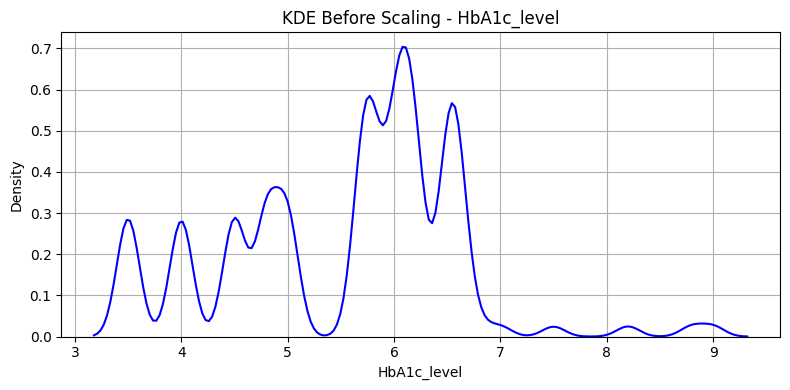

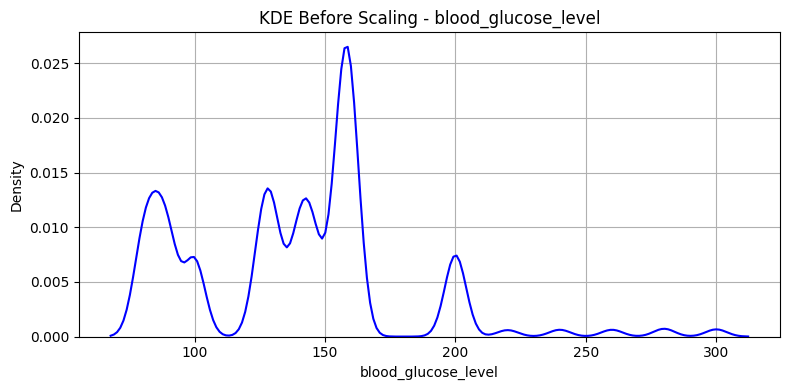

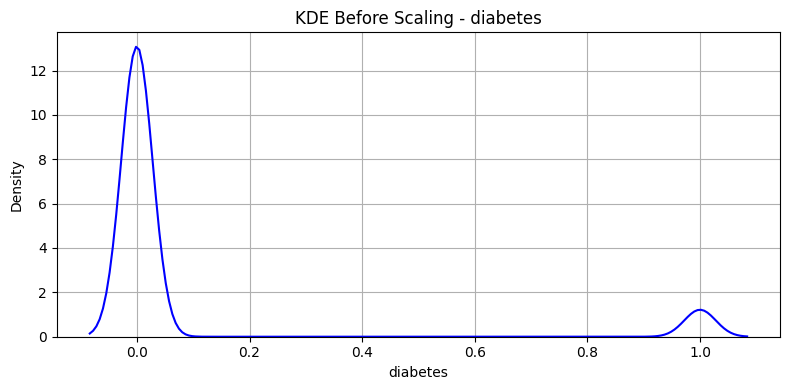

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load your dataset
# Select numeric columns only
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns

# Plot KDE for original (unscaled) data
for col in numeric_cols:
    plt.figure(figsize=(8, 4))
    sns.kdeplot(df[col], label='Original', color='blue')
    plt.title(f'KDE Before Scaling - {col}')
    plt.xlabel(col)
    plt.ylabel('Density')
    plt.grid(True)
    plt.tight_layout()
    plt.show()


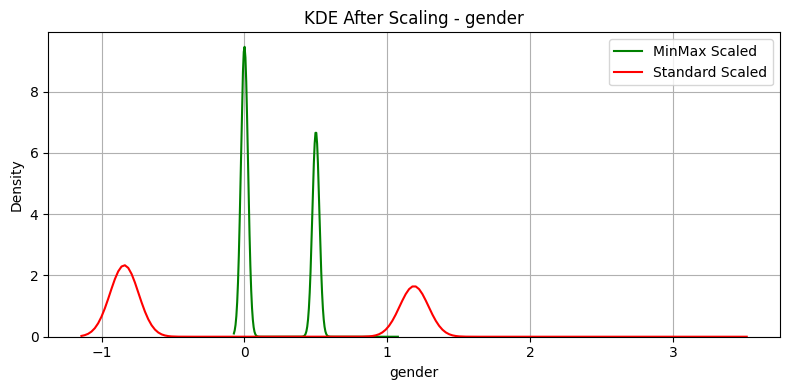

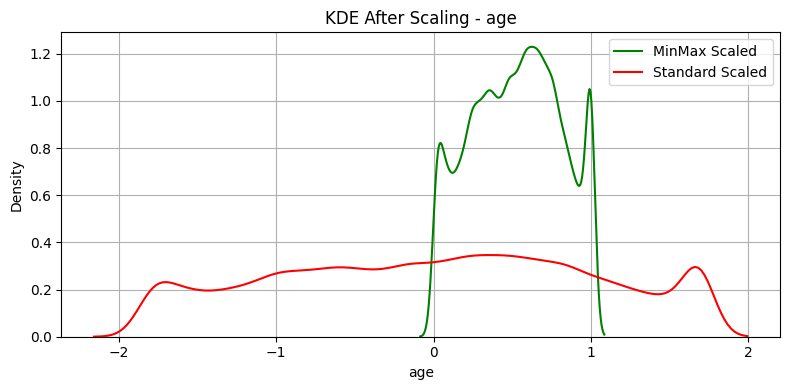

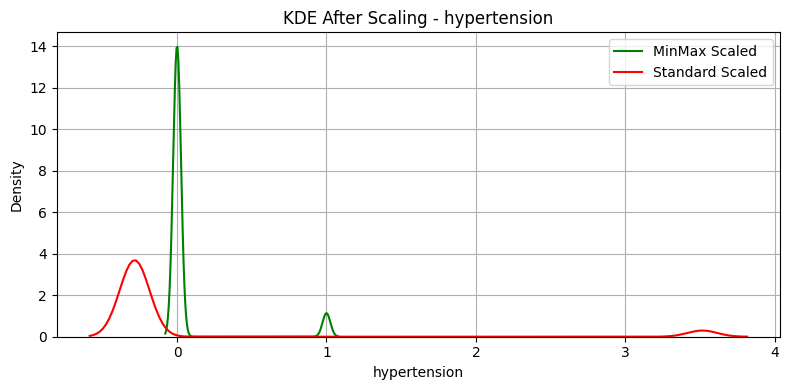

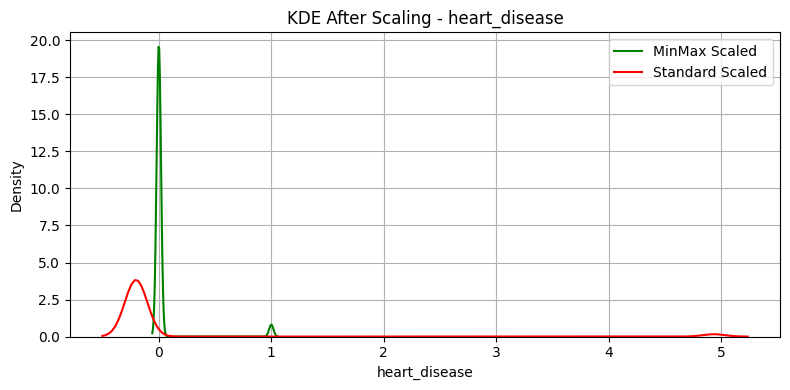

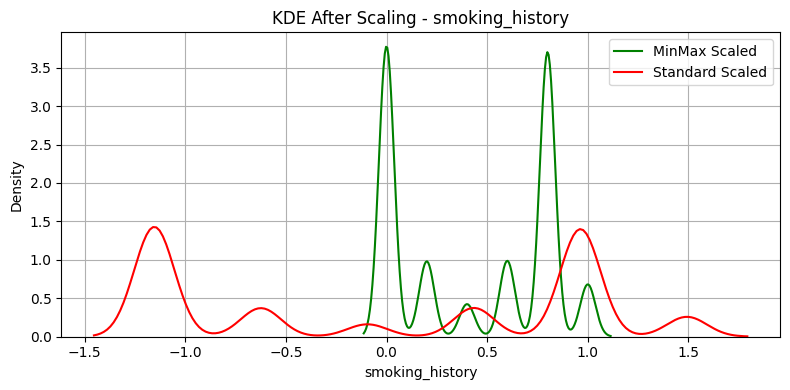

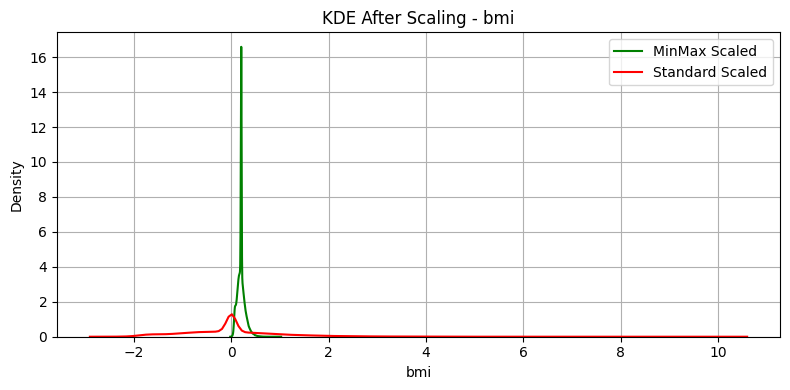

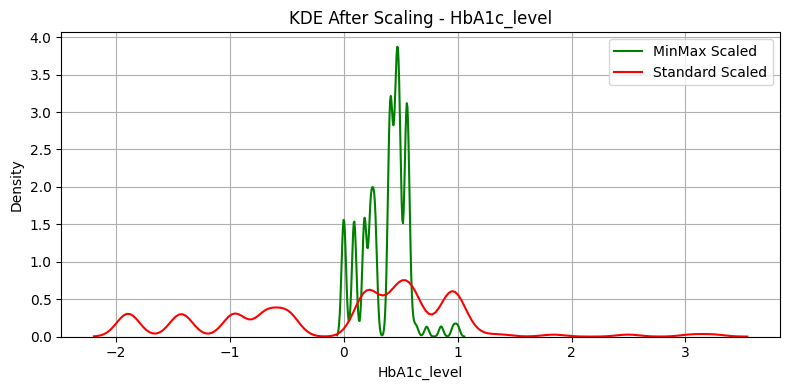

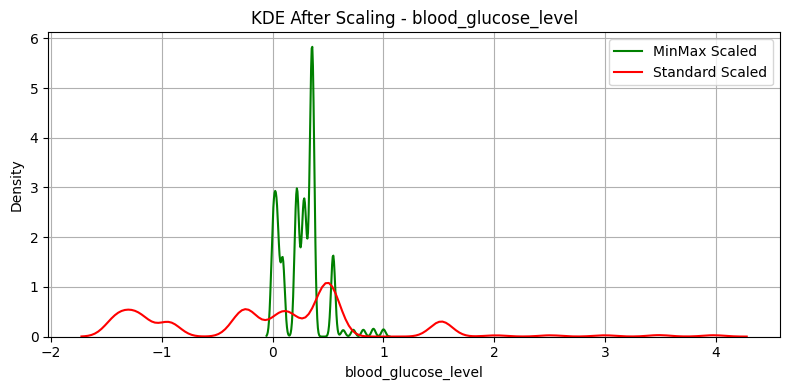

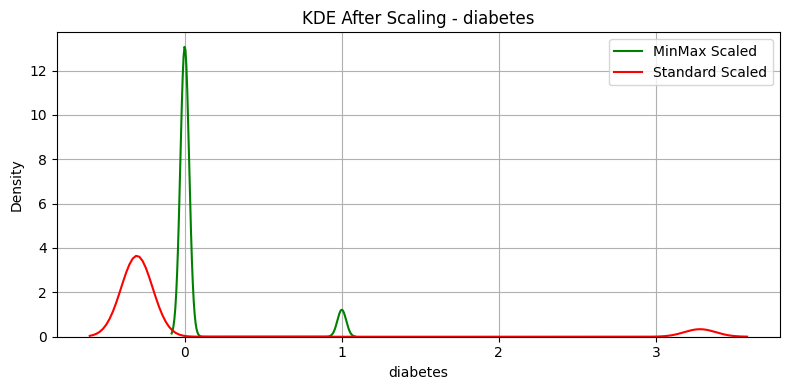

In [ ]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

# Apply MinMax and Standard Scaling
minmax = MinMaxScaler()
standard = StandardScaler()

df_minmax = pd.DataFrame(minmax.fit_transform(df[numeric_cols]), columns=numeric_cols)
df_standard = pd.DataFrame(standard.fit_transform(df[numeric_cols]), columns=numeric_cols)

# Plot KDE for scaled data
for col in numeric_cols:
    plt.figure(figsize=(8, 4))
    sns.kdeplot(df_minmax[col], label='MinMax Scaled', color='green')
    sns.kdeplot(df_standard[col], label='Standard Scaled', color='red')
    plt.title(f'KDE After Scaling - {col}')
    plt.xlabel(col)
    plt.ylabel('Density')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


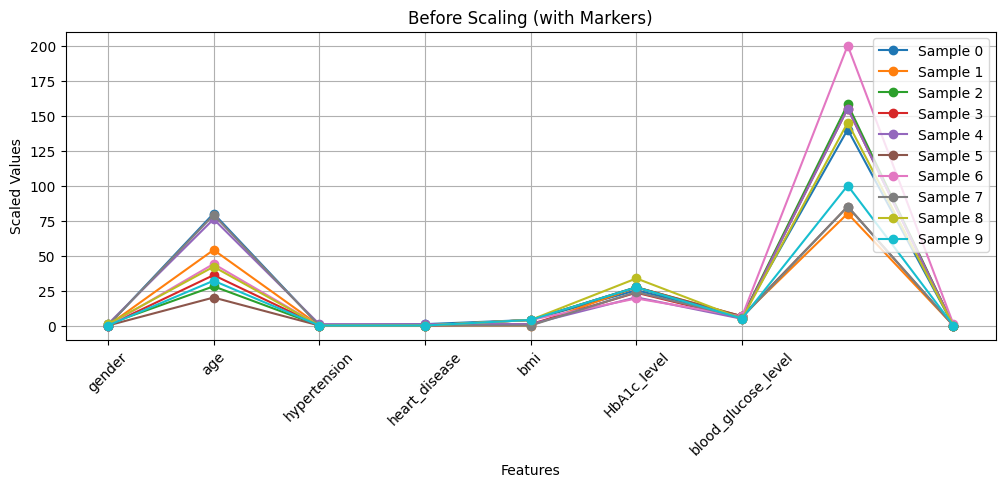

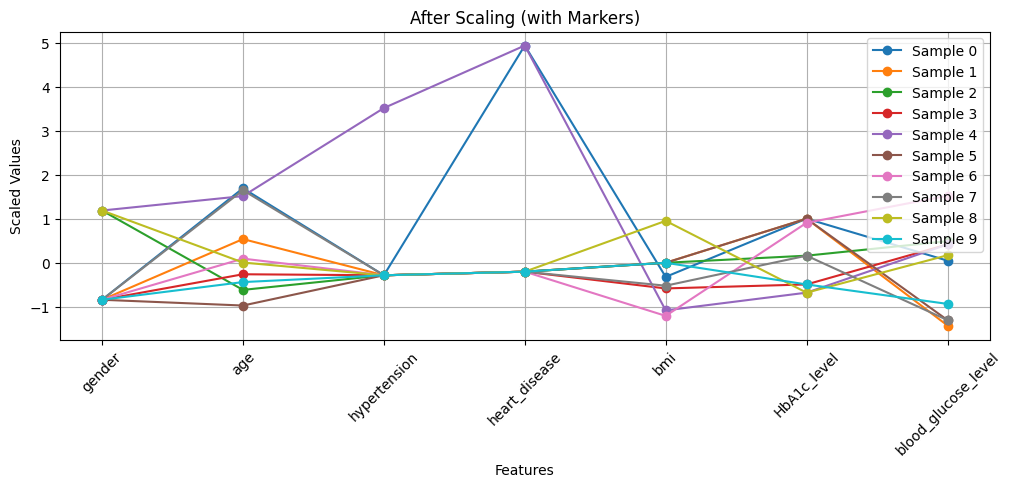

In [ ]:
features = ['gender', 'age', 'hypertension', 'heart_disease',
            'bmi', 'HbA1c_level', 'blood_glucose_level']  # Excluding 'smoking_history' & 'diabetes'

# Step 4: Standard scaling
scaler = StandardScaler()
scaled = pd.DataFrame(scaler.fit_transform(df[features]), columns=features)

# Plot before scaling
plt.figure(figsize=(12, 4))
for i in range(10):
    plt.plot(df.iloc[i], marker='o', label=f'Sample {i}')
plt.title("Before Scaling (with Markers)")
plt.xlabel("Features")
plt.ylabel("Scaled Values")
plt.xticks(ticks=range(len(features)), labels=features, rotation=45)
plt.legend(loc='upper right')
plt.grid(True)
plt.show()

# Plot after scaling
plt.figure(figsize=(12, 4))
for i in range(10):
    plt.plot(scaled.iloc[i], marker='o', label=f'Sample {i}')
plt.title("After Scaling (with Markers)")
plt.xlabel("Features")
plt.ylabel("Scaled Values")
plt.xticks(ticks=range(len(features)), labels=features, rotation=45)
plt.legend(loc='upper right')
plt.grid(True)
plt.show()


In [ ]:

# Feature-target split
X = df.drop("diabetes", axis=1)
y = df["diabetes"]

# Scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score

model = LogisticRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)

print("MSE :", mse)
print("RMSE:", rmse)
print("MAE :", mae)

Accuracy: 0.9587
MSE : 0.0413
RMSE: 0.20322401432901577
MAE : 0.0413


In [ ]:
from sklearn.neighbors import KNeighborsClassifier

model = KNeighborsClassifier(n_neighbors=5)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)

print("MSE :", mse)
print("RMSE:", rmse)
print("MAE :", mae)

Accuracy: 0.96135
MSE : 0.03865
RMSE: 0.19659603251337499
MAE : 0.03865


In [ ]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)

print("MSE :", mse)
print("RMSE:", rmse)
print("MAE :", mae)


Accuracy: 0.95205
MSE : 0.04795
RMSE: 0.21897488440458188
MAE : 0.04795


In [ ]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)

print("MSE :", mse)
print("RMSE:", rmse)
print("MAE :", mae)


Accuracy: 0.97065
MSE : 0.02935
RMSE: 0.17131841699011816
MAE : 0.02935


In [ ]:
from sklearn.svm import SVC

model = SVC()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)

print("MSE :", mse)
print("RMSE:", rmse)
print("MAE :", mae)

Accuracy: 0.96235
MSE : 0.03765
RMSE: 0.19403607911932255
MAE : 0.03765
